In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= '0.20'

import os
datapath = os.path.join("datasets", "lifesat", "")

import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ('oecd_bli_2015.csv', 'gdp_per_capita.csv'):
    print('Downloading:',filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath+filename)

Downloading: oecd_bli_2015.csv
Downloading: gdp_per_capita.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',',
                            delimiter='\t', encoding='latin1', na_values='n/a')

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats['Life satisfaction']]

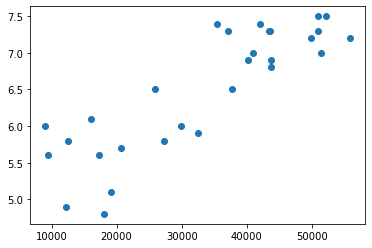

In [9]:
plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'])
plt.show()

In [10]:
model = linear_model.LinearRegression()
model.fit(X, y)
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


In [22]:
print('{}*x + {}'.format(model.coef_[0][0], model.intercept_[0]))

4.911544589158484e-05*x + 4.853052800266436


In [15]:
model.coef_

array([[4.91154459e-05]])

In [25]:
from sklearn.neighbors import KNeighborsRegressor

model1 = KNeighborsRegressor(n_neighbors=3)
model1.fit(X, y)
print(model1.predict(X_new))

[[5.76666667]]
